### Learning with Ensembles

Focus on the "majority voting" principle: select the class lsbel that has been predicted by the majority of classifiers (e.g. recieved more than 50% of the votes) For multiclass systems use "plurality voting" which is just selecting the modal group. 

Can use same or different algorithms to generate votes

Use binomial distribution (and the binomial coefficient) to get a smaller error rate than any individual classifier alone. Certain assumptions must be made (generally, that errors across classifiers are equal and that models are independent- although these may be relaxed). 

To compare an idealistic endsemble over a range of different base error rates, can implement the probability mass function. 

In [3]:
from scipy.misc import comb
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.0))
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k)
            for k in range(k_start, int(n_classifier + 1))]
    return sum(probs)

ensemble_error(n_classifier = 11, error = 0.25)

0.034327507019042969

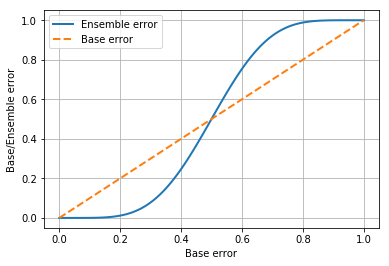

In [5]:
# For a range of different base errors from 0.0 to 1.0

import numpy as np
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]
import matplotlib.pyplot as plt
plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, linestyle='--', label = 'Base error', linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Above: Ensemble error ALWAYS performs better than individual base classifiers as long as base classifiers perform better than random guessing.

### Implementing a simple majority vote classifier

In [6]:
#### Concept of weighted majority (i.e., giving one classifier more votes than others)

import numpy as np
np.argmax(np.bincount([0, 0, 1],
                     weights=[0.2, 0.2, 0.6]))

1

In [9]:
### Based on class probabilites

ex = np.array([[0.9,0.1],
             [0.8, 0.2],
             [0.4, 0.6]])

p = np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
print(p)
print(np.argmax(p))

[ 0.58  0.42]
0


In [11]:
# implement a MajorityVoteClassifier 

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator 

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    """ A Majority vote ensemble classifier 
    
    Params
    --------------
    
    classifiers: array-lline, shape = n_classifiers
        Different classifiers for the ensemble
        
    vote: str, {'classlabel', 'probability'}
        Default: 'classlabel'
        If 'classlabel' the prediciton is based on the argmax
        of the class lables. Else if 'probability' the argmax of the
        sum of the probabilities is used to predict the class label
        (recommended for calibrated classifiers).
        
    Weights: array-like, shape = [n_classifiers]
        Optional, default: None
        If a list of `int` or `float` values are provided, the 
        classifiers are weighted by importance; Uses uniform weights
        if weights = None"""
    
    def __init__(self, classifiers, vote = 'classlabel', weights = None):
        
        self.classifiers = classifiers
        
        self.named_classifiers = {key: value for key, value in
                                 _name_estimators(classifiers)}
        
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        
        """Fit Classifiers.
        parameters
        -----------
        
        X: {array-like, sparse matrix},
            shape = [n_samples, n_features]
            Matrix of training samples
            
        y: array-like, shape = [n_samples]
            vector of target class labels.
            
        Returns
        --------
        self: object"""
        
    # Use LabelEncoder to ensure class labels start with 0 (important for np.argmax in self.predict)

        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                                  self.lablenc_.transofrm(y))
            self.classifiers_.append(fitted_clf)
        return self 

In [ ]:
def predict(self, X):
    """ Predict class labels for X.
    
    Parameters
    -----------"""